### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

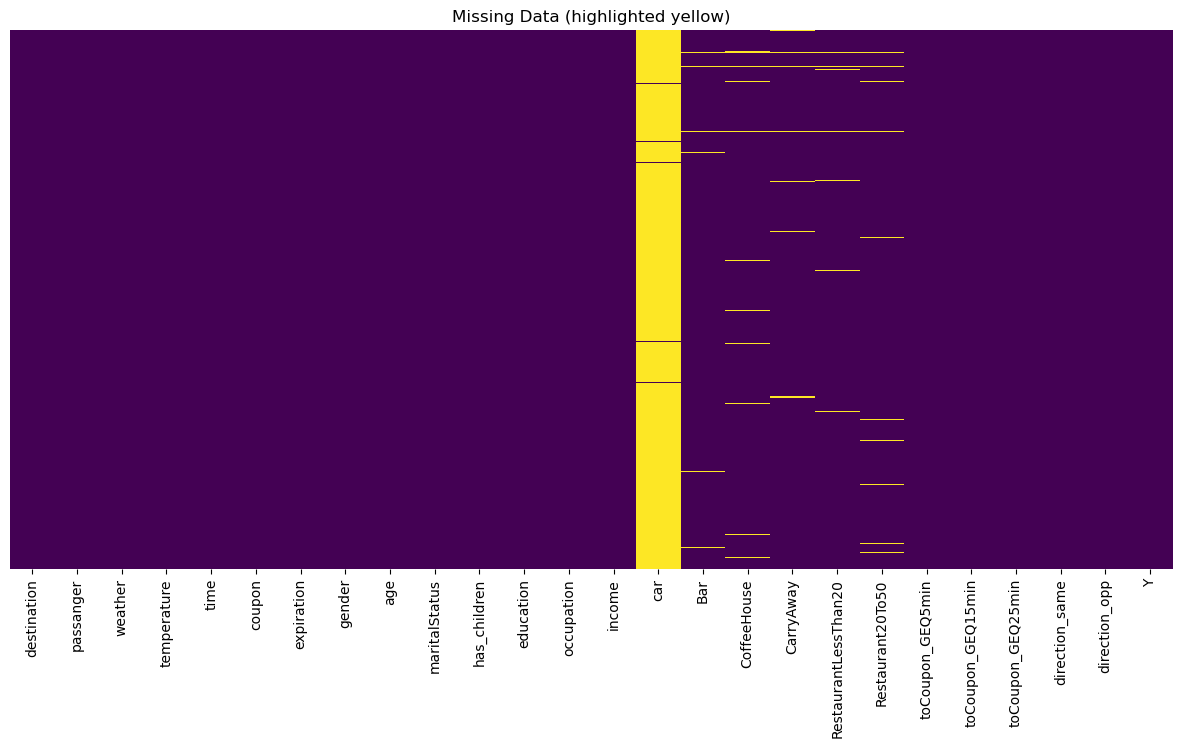

In [5]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data (highlighted yellow)')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

### Passenger column is mispelled so correcting this

In [6]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)

### 'Car' column only has 108 non-null values out of over 12,000 entries so I am dropping this column

In [7]:
# drop the cars column because it only has 108 non-null values.
if 'car' in data:
    data.drop(columns=['car'], inplace=True)

# check all columns that have NA information and print them out.
na_columns = data.columns[data.isna().any()].tolist()
print(na_columns)


['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


### I am deciding to leave the original integrity of the data without filling for NA vaules
I am leaving the code to fill NA cells commented out for base calculations. I can always modify this later

In [8]:
# put the columns with NA values into a list and fill the cells with missing values.
# cols_with_na = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# for col in cols_with_na:
#     data[col].fillna('MissingValue', inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
accepted_proportion = data['Y'].mean()
print(f"{accepted_proportion * 100:.2f}% of the respondents chose to accept the coupon.")


56.84% of the respondents chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

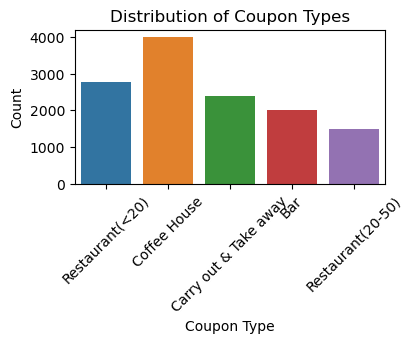

In [10]:
plt.figure(figsize=(4,2))
sns.countplot(data=data, x='coupon')
plt.title('Distribution of Coupon Types')
plt.ylabel('Count')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

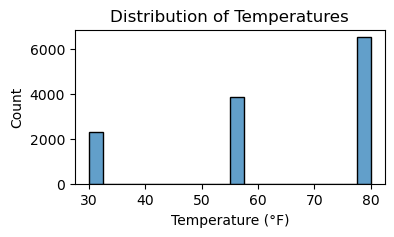

In [11]:
plt.figure(figsize=(4,2))
sns.histplot(data['temperature'], bins=20, alpha=0.7)
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
bar_data = data[data['coupon'].isin(['Bar'])]
bar_data['coupon'].unique()

array(['Bar'], dtype=object)

2. What proportion of bar coupons were accepted?


In [13]:
bar_acceptance_rate = bar_data['Y'].mean()
print(f"{bar_acceptance_rate * 100:.2f}% of bar coupons were accepted.")


41.00% of bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# print(bar_data['occupation'].unique())
bar_low_frequency = bar_data[(bar_data['Bar'].isin(['never','less1','1~3']))]['Y'].mean()

bar_high_frequency = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()

print(f"{bar_low_frequency * 100:.2f}% of people who went to a bar 3 or fewer times a month accepted the coupon.")
print(f"{bar_high_frequency * 100:.2f}% of people who went more frequently accepted the coupon.")

37.06% of people who went to a bar 3 or fewer times a month accepted the coupon.
76.88% of people who went more frequently accepted the coupon.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:

over_25_and_freq = bar_data[
    (~bar_data['Bar'].isin(['never', 'less1'])) & 
    (~bar_data['age'].isin(['below21', '21']))
]['Y'].mean()

others_acceptance_rate = bar_data[
    (bar_data['Bar'].isin(['never', 'less1'])) |
    (bar_data['age'].isin(['below21', '21']))
]['Y'].mean()

print(f"{over_25_and_freq * 100:.2f}% of people over 25 who went to a bar more than once a month accepted the coupon.")
print(f"{others_acceptance_rate * 100:.2f}% of others accepted the coupon.")


68.18% of people over 25 who went to a bar more than once a month accepted the coupon.
33.42% of others accepted the coupon.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
# filter the requirements
filtered_data = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_data['passenger'].isin(['Kid(s)'])) & 
    (~bar_data['occupation'].isin(['Farming, Fishing, and Forestry']))
]

# find acceptance rate for filtered data
acceptance_rate_filtered = filtered_data['Y'].mean()

# find acceptance rate for all others
all_others = bar_data.drop(filtered_data.index)
acceptance_rate_others = all_others['Y'].mean()

print(f"Acceptance rate for drivers going to bars more than once a month, with no kids as passengers, and occupations other than farming, fishing, or forestry: {acceptance_rate_filtered * 100:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others * 100:.2f}%")


Acceptance rate for drivers going to bars more than once a month, with no kids as passengers, and occupations other than farming, fishing, or forestry: 71.32%
Acceptance rate for all other drivers: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [17]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
group1 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (~bar_data['passenger'].isin(['kid(s)'])) & 
    (~bar_data['maritalStatus'].isin(['widowed']))
]['Y'].mean()

# go to bars more than once a month and are under the age of 30 OR
group2 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_data['age'].isin(['below21', '21', '26']))
]['Y'].mean()

# go to cheap restaurants more than 4 times a month and income is less than 50K.
group3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (data['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]['Y'].mean()

# Print the results
print(f"{group1 * 100:.2f}% people who go to bars more than once a month, had passengers that were not a kid, and were not widowed.")
print(f"{group2 * 100:.2f}% people who go to bars more than once a month and are under the age of 30.")
print(f"{group3 * 100:.2f}% people who go to cheap restaurants more than 4 times a month and income is less than 50K.")


68.79% people who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
72.17% people who go to bars more than once a month and are under the age of 30.
59.40% people who go to cheap restaurants more than 4 times a month and income is less than 50K.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### The rate at which people visits bars shows a strong correlation between the rate at which the coupon was accepted. Those who go to bars more frequently (more than once a month) are more likely to accept the coupon. Specifically, those who go to bars 4 or more times a month have a significantly higher acceptance rate (76.88%) compared to those who go 3 or fewer times a month (37.07%).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [19]:
coffee_data = data[data['coupon'].isin(['Coffee House'])]

In [20]:
coffee_acceptance_rate = coffee_data['Y'].mean()
print(f"{coffee_acceptance_rate * 100:.2f}% of coffee house coupons were accepted.")

49.92% of coffee house coupons were accepted.


In [21]:
# rate for both male/female
male_acceptance = coffee_data[coffee_data['gender'].isin(['Bar'])]['Y'].mean()
female_acceptance = coffee_data[coffee_data['gender'].isin(['Female'])]['Y'].mean()
print(f"Male acceptance rate: {male_acceptance * 100:.2f}%")
print(f"Female acceptance rate: {female_acceptance * 100:.2f}%")


Male acceptance rate: nan%
Female acceptance rate: 49.24%


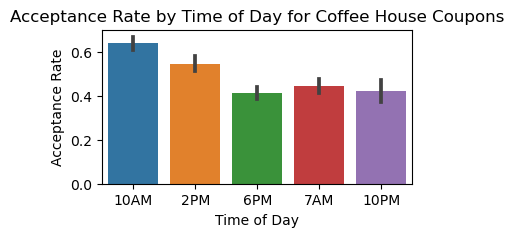

In [22]:
plt.figure(figsize=(4,2))
sns.barplot(x="time", y="Y", data=coffee_data)
plt.title('Acceptance Rate by Time of Day for Coffee House Coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Time of Day')
plt.show()


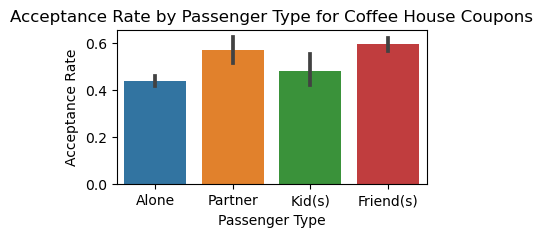

In [23]:
plt.figure(figsize=(4,2))
sns.barplot(x="passenger", y="Y", data=coffee_data, order=['Alone', 'Partner', 'Kid(s)', 'Friend(s)'])
plt.title('Acceptance Rate by Passenger Type for Coffee House Coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')
plt.show()


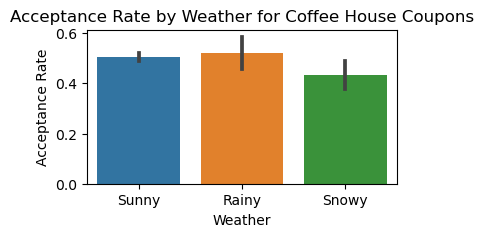

In [24]:
plt.figure(figsize=(4,2))
sns.barplot(x="weather", y="Y", data=coffee_data)
plt.title('Acceptance Rate by Weather for Coffee House Coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Weather')
plt.show()


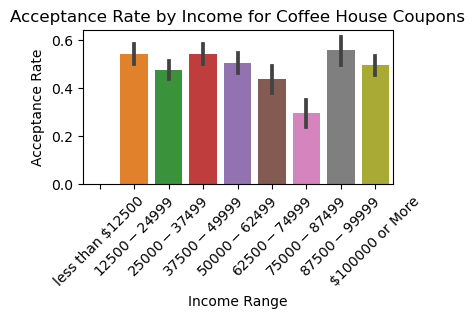

In [25]:
plt.figure(figsize=(4,2))
sns.barplot(x="income", y="Y", data=coffee_data, order=['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
plt.title('Acceptance Rate by Income for Coffee House Coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income Range')
plt.xticks(rotation=45)
plt.show()


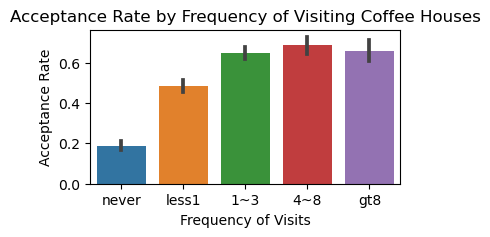

In [26]:
plt.figure(figsize=(4,2))
sns.barplot(x="CoffeeHouse", y="Y", data=coffee_data, order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.title('Acceptance Rate by Frequency of Visiting Coffee Houses')
plt.ylabel('Acceptance Rate')
plt.xlabel('Frequency of Visits')
plt.show()
